# First Problem

In the article [1] we can see an example of tensor in figure 4. The construction of this tensor is described there. They try to compute a non-negative CPD for this tensor in this article. This is possible since the figure can be considered as having only $0$'s and $1$'s. 

Here we will construct the same tensor (the *swimmer_tensor* module) and use the **cpd** function with $r = 50$ to computes its CPD. This value of $r$ is suggested in the same article.


[1] *Non-Negative Tensor Factorization with Applications to Statistics and Computer Vision* - A. Shashua and T. Hazan 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import TensorFox as tf
import swimmer_tensor as st

In [2]:
# Create tensor T. It has shape 32 x 32 x 256. 
T = st.create()
m, n, p = T.shape
Tsize = np.linalg.norm(T)

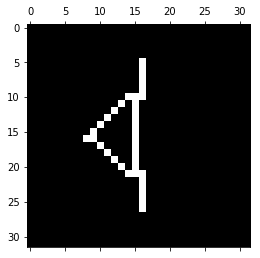

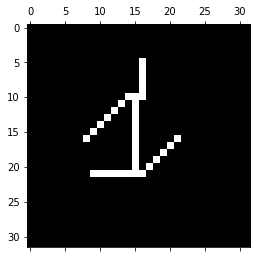

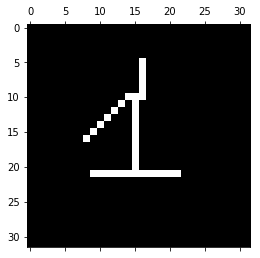

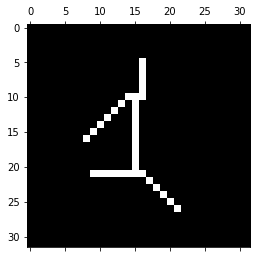

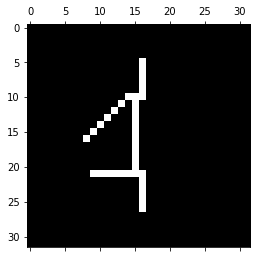

In [3]:
# Visualize some frames, i.e., some frontal slices of the tensor.
for s in range(195,200):
    plt.matshow(T[:,:,s],cmap='Greys')

In [4]:
# Compute the CPD of T, assuming T has rank 50. 
# We will use default options for now, except the display option, which will be set to 'partial'.
r = 50
Lambda, X, Y, Z, T_approx, rel_error, step_sizes_trunc, step_sizes_refine, errors_trunc, errors_refine, stop_trunc, stop_refine = tf.cpd(T, r, energy=99, display='full', full_output=True)

-------------------------------------------------------
Computing HOSVD of T
    Compression detected
    Compressing from (256, 32, 32) to (13, 15, 23)
    Compression relative error = 1.1263e-14
-------------------------------------------------------
Computing truncation
    No truncation detected
-------------------------------------------------------
Type of initialization: smart random
    Initial guess relative error = 0.99977
-------------------------------------------------------
Computing truncated CPD of T
    Iteration | Rel Error |  Damp  | #CG iterations 
        1     |  0.99953  |  2.0  |  8
        2     |  0.99872  |  2.0  |  11
        3     |  7.11335  |  1.0  |  4
        4     |  2.36471  |  0.5  |  6
        5     |  0.76953  |  0.75  |  12
        6     |  0.30481  |  1.12  |  6
        7     |  0.19941  |  1.69  |  7
        8     |  0.15455  |  0.844  |  6
        9     |  0.12976  |  0.422  |  7
        10     |  0.11101  |  0.211  |  13
        11     |  0.09

# Analyzing and Visualizing the Solution

Our solution above can be considered as satisfactory since the relative error is of order $O(10^{-4})$. Notice that the error associated to the starting point is close to $0.99977$. The remarkable thing here is the compression, which reduced greatly the tensor without losing precision (the error after compressing is of order $O(10^{-14})$). The compression is so good that it makes the program unable to truncate more. 

As we did before, let's plot the step sizes of all iterations.

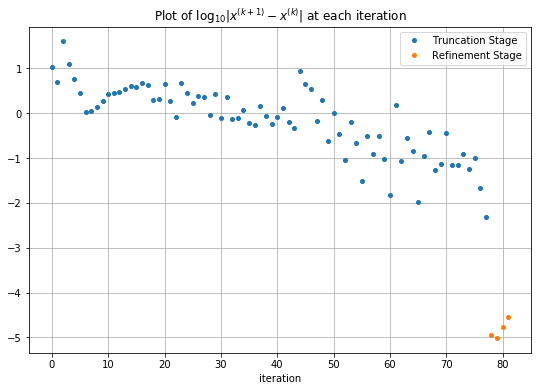

In [5]:
# Plot the step sizes of the iterations.
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 6

a = step_sizes_trunc.shape[0]
b = step_sizes_refine.shape[0]

plt.plot(np.arange(0, a), np.log10(step_sizes_trunc), 'o', markersize=4, label='Truncation Stage')
plt.plot(np.arange(a, a+b), np.log10(step_sizes_refine), 'o', markersize=4, label='Refinement Stage')
plt.title(r'Plot of $\log_{10} \|x^{(k+1)} - x^{(k)} \|$ at each iteration', fontsize=12)
plt.xlabel('iteration')
plt.grid()
plt.legend()
plt.show()

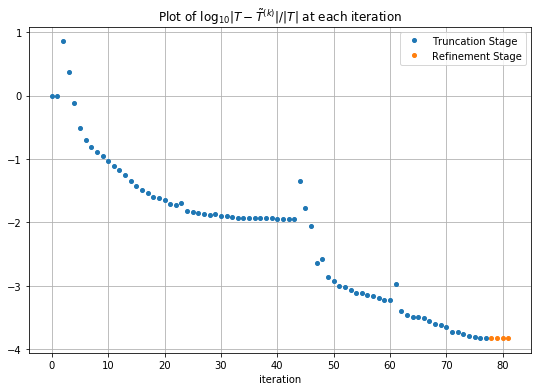

In [6]:
# Plot the relative error of the iterations. Since the output errors of the cpd are absolute errors,
# we mist divide them by the norm of T.
Tsize = np.linalg.norm(T)

a = errors_trunc.shape[0]
b = errors_refine.shape[0]

plt.plot(np.arange(0, a), np.log10(1/Tsize*errors_trunc), 'o', markersize=4, label='Truncation Stage')
plt.plot(np.arange(a, a+b), np.log10(1/Tsize*errors_refine), 'o', markersize=4, label='Refinement Stage')
plt.title(r'Plot of $\log_{10} \|T - \tilde{T}^{(k)}\| / |T|$ at each iteration', fontsize=12)
plt.xlabel('iteration')
plt.grid()
plt.legend()
plt.show()

Below we show some slices of our computed tensor. We show the same slices plotted before so we can compare them. As we can see, it is almost impossible to notice some difference with the naked eye. The CPD computed is a success!

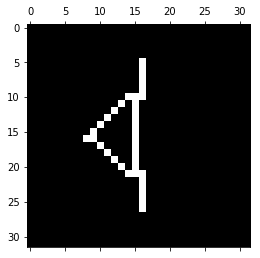

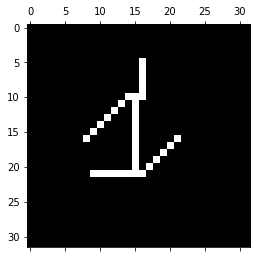

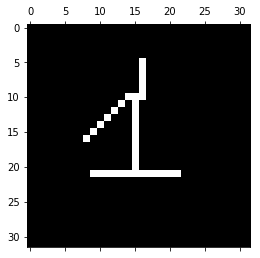

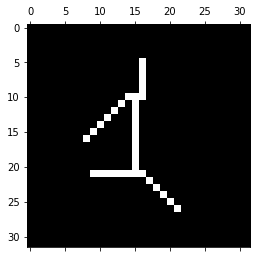

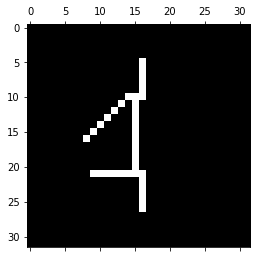

In [7]:
fig_size[0] = 6
fig_size[1] = 4

for s in range(195,200):
    plt.matshow(T_approx[:,:,s],cmap='Greys')

To finish, we may have noted that the computation of this CPD is not always good. Sometimes we need to repeat the computation to get a good CPD. This is due to the initialization point for the iteration. Althought the strategy used in TensorFox always generates a initial point close to the objetive point, the path of the iteration may lead to a local optima. This phenomenon is not exclusive to TensorFox, and probably all solvers suffers from this issue. 

For this problem in particular we can use the function **stats** to see how the initialization changes the results.

10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %
100.0 %


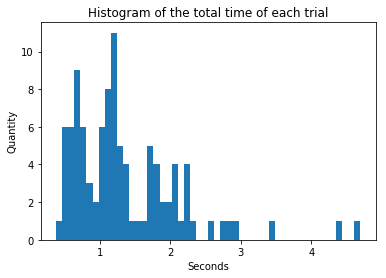

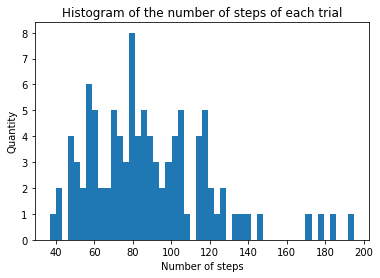

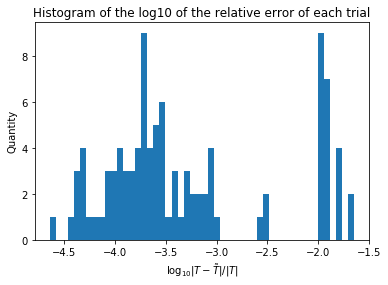

In [8]:
times, steps, rel_errors = tf.stats(T, r)

In [9]:
print('E[seconds] =', times.mean())
print()
print('E[number of steps] =', steps.mean())
print()
print('E[relative error] =', rel_errors.mean())

E[seconds] = 1.362613799571991

E[number of steps] = 88.63

E[relative error] = 0.003188779761467111


From the histograms we see that the computational time concentrates around $1$ second, the number of steps concentrates between $40$ and $120$ and the error concentrates between $-4.5$ and $-3$ (in $log_{10}$ scale). It is not hard to guess we can have an error of order $O(10^{-4})$ if we try to compute a few CPD's, maybe three or four attempts. 